## Importing of libraries

In [295]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from prettytable import PrettyTable
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
import itertools
from sklearn.naive_bayes import GaussianNB

## Loading the Data

In [296]:
ad_click = pd.read_csv('Ad_click_prediction_train.csv')

In [297]:
ad_click.head(10)

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,140690,2017-07-02 00:00,858557,C,359520,13787,4,NaN,10.0,Female,4.0,3.0,3.0,0,0
1,333291,2017-07-02 00:00,243253,C,105960,11085,5,NaN,8.0,Female,2.0,2.0,NaN,0,0
2,129781,2017-07-02 00:00,243253,C,359520,13787,4,NaN,8.0,Female,2.0,2.0,NaN,0,0
3,464848,2017-07-02 00:00,1097446,I,359520,13787,3,NaN,3.0,Male,3.0,3.0,2.0,1,0
4,90569,2017-07-02 00:01,663656,C,405490,60305,3,NaN,2.0,Male,2.0,3.0,2.0,1,0
5,151475,2017-07-02 00:01,509591,I,359520,13787,2,NaN,1.0,Male,1.0,3.0,NaN,0,0
6,17583,2017-07-02 00:01,1091463,F,405490,60305,3,NaN,9.0,Female,3.0,3.0,4.0,0,0
7,461128,2017-07-02 00:01,469098,C,360936,13787,3,NaN,4.0,Male,4.0,3.0,4.0,0,0
8,390699,2017-07-02 00:02,611906,H,105960,11085,5,270915.0,NaN,NaN,NaN,NaN,NaN,0,0
9,353607,2017-07-02 00:02,418107,B,360936,13787,2,NaN,4.0,Male,4.0,3.0,4.0,0,0


# Summary of the data

In [298]:
ad_click.describe()

,session_id,user_id,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,age_level,user_depth,city_development_index,var_1,is_click
count,463291.000000,4.632910e+05,463291.000000,463291.000000,463291.000000,97437.000000,445048.000000,445048.000000,445048.000000,338162.000000,463291.000000,463291.000000
mean,285544.090725,5.460497e+05,308474.540069,29685.878994,3.072427,162753.345105,3.477396,2.782266,2.878415,2.557121,0.422169,0.067627
std,168577.345887,3.294625e+05,126517.101294,21542.053106,1.304233,78743.742720,2.412889,1.069701,0.400130,0.921345,0.493906,0.251105
min,2.000000,4.000000e+00,82320.000000,1734.000000,1.000000,18595.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,137856.500000,2.578550e+05,118601.000000,13787.000000,2.000000,82527.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000
50%,285429.000000,5.318010e+05,359520.000000,13787.000000,3.000000,146115.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
75%,435535.500000,8.278490e+05,405490.000000,53587.000000,4.000000,254132.000000,4.000000,3.000000,3.000000,3.000000,1.000000,0.000000
max,595812.000000,1.141729e+06,414149.000000,60305.000000,5.000000,450184.000000,12.000000,6.000000,3.000000,4.000000,1.000000,1.000000


## Exploratory Data Analysis

#### Number of Null Values in the dataset

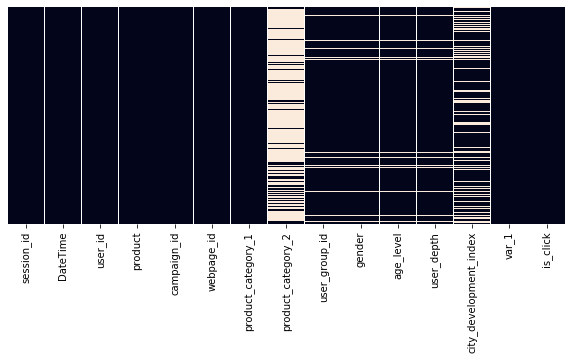

In [299]:
fig, ax = plt.subplots(figsize=(10,4))
sns.heatmap(ad_click.isna(),yticklabels=False,cbar=False)

#### White lines depict the null values in each column

### Comparisions for Day, Month, Year, Hour and Minutes for ad clicked analysis

#### Splitting the Datetime into Day, Month, Year, Hour and Minutes

In [300]:
ad_click['time'] = ad_click['DateTime'].apply(lambda x : x.split(' ')[1])
ad_click['date'] = ad_click['DateTime'].apply(lambda x : x.split(' ')[0])
ad_click['year'] = ad_click['date'].apply( lambda x : x.split('-')[0] )
ad_click['month'] = ad_click['date'].apply( lambda x : x.split('-')[1] )
ad_click['day'] = ad_click['date'].apply( lambda x : x.split('-')[2] )
ad_click['hour'] = ad_click['time'].apply( lambda x : x.split(':')[0] )
ad_click['minutes'] = ad_click['time'].apply( lambda x : x.split(':')[1] )

In [301]:
ad_click.drop(['DateTime'],inplace=True,axis=1)
ad_click.drop(['date'],axis = 1,inplace=True)
ad_click.drop(['time'],axis = 1,inplace=True)

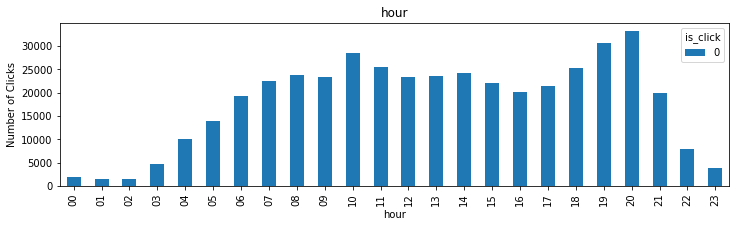

Text(0, 0.5, 'Number of Clicks')

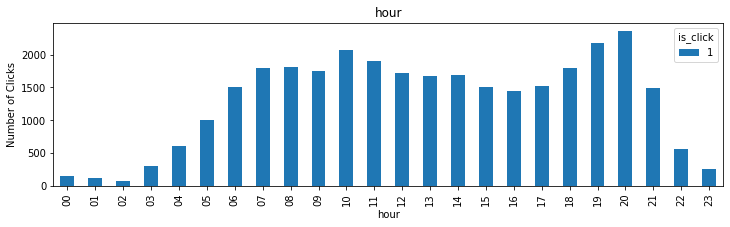

In [302]:
ad_click[ad_click['is_click']==0].groupby(['hour','is_click']).size().unstack().plot(kind='bar', title="hour", figsize=(12,3))
plt.xlabel('hour')
plt.ylabel('Number of Clicks')
plt.show() 

ad_click[ad_click['is_click']==1].groupby(['hour','is_click']).size().unstack().plot(kind='bar', title="hour", figsize=(12,3))
plt.xlabel('hour')
plt.ylabel('Number of Clicks')

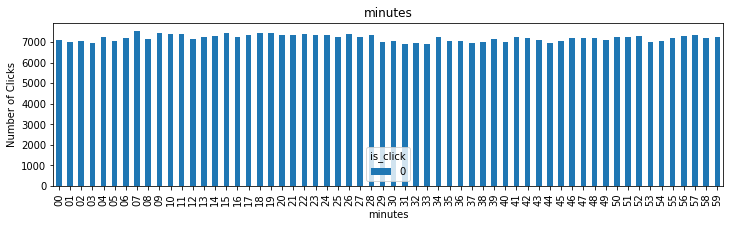

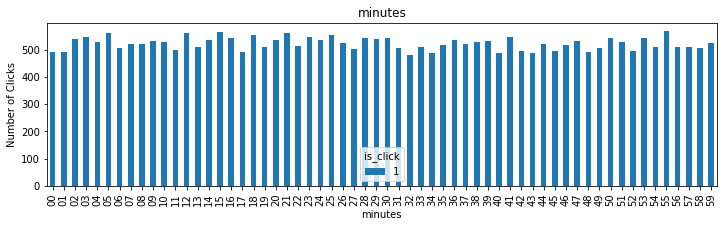

In [303]:
ad_click[ad_click['is_click']==0].groupby(['minutes','is_click']).size().unstack().plot(kind='bar', title="minutes", figsize=(12,3))
plt.xlabel('minutes')
plt.ylabel('Number of Clicks')

ad_click[ad_click['is_click']==1].groupby(['minutes','is_click']).size().unstack().plot(kind='bar', title="minutes", figsize=(12,3))
plt.xlabel('minutes')
plt.ylabel('Number of Clicks')
plt.show() 


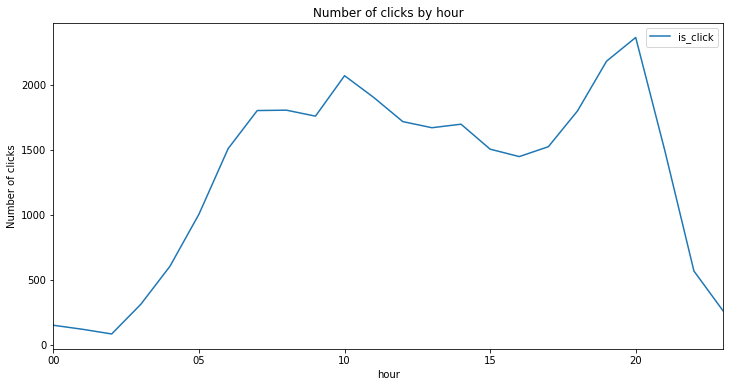

In [304]:
ad_click.groupby('hour').agg({'is_click':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Number of clicks by hour');

#### Comparisions for CampaignID for ad clicked analysis

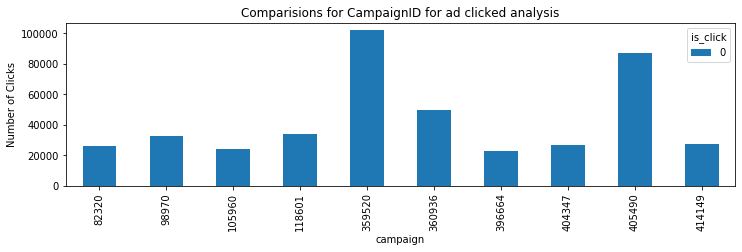

Text(0, 0.5, 'Number of Clicks')

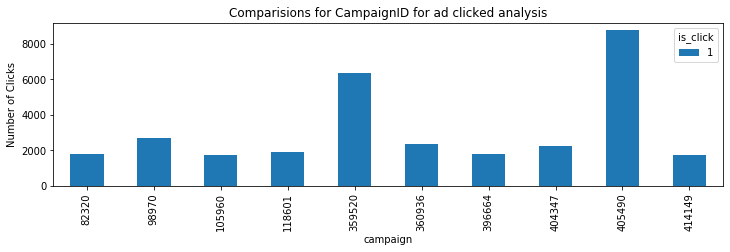

In [305]:

ad_click[ad_click['is_click']==0].groupby(['campaign_id','is_click']).size().unstack().plot(kind='bar', title="Comparisions for CampaignID for ad clicked analysis", figsize=(12,3))
plt.xlabel('campaign')
plt.ylabel('Number of Clicks')
plt.show() 

ad_click[ad_click['is_click']==1].groupby(['campaign_id','is_click']).size().unstack().plot(kind='bar', title="Comparisions for CampaignID for ad clicked analysis", figsize=(12,3))
plt.xlabel('campaign')
plt.ylabel('Number of Clicks')

#### Comparisions for Webpage_ID for ad clicked analysis

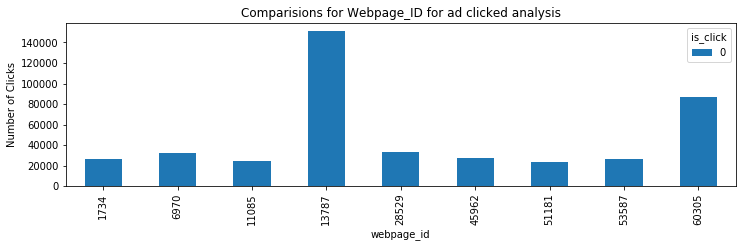

Text(0, 0.5, 'Number of Clicks')

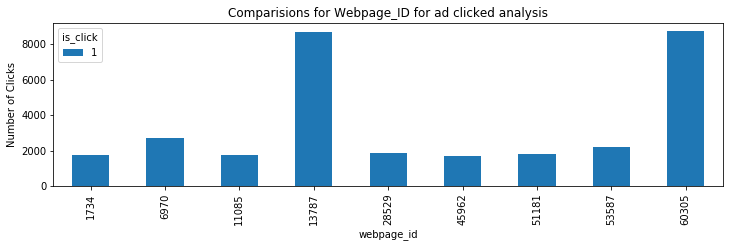

In [306]:
ad_click[ad_click['is_click']==0].groupby(['webpage_id','is_click']).size().unstack().plot(kind='bar', title="Comparisions for Webpage_ID for ad clicked analysis", figsize=(12,3))
plt.xlabel('webpage_id')
plt.ylabel('Number of Clicks')
plt.show() 

ad_click[ad_click['is_click']==1].groupby(['webpage_id','is_click']).size().unstack().plot(kind='bar', title="Comparisions for Webpage_ID for ad clicked analysis", figsize=(12,3))
plt.xlabel('webpage_id')
plt.ylabel('Number of Clicks')


#### Comparisions for Product_Category_1 for ad clicked analysis

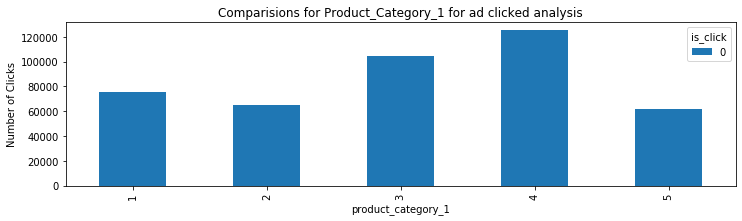

Text(0, 0.5, 'Number of Clicks')

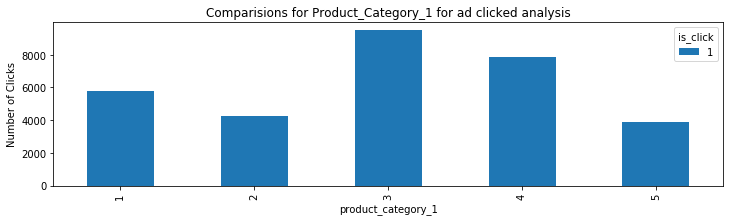

In [307]:
ad_click[ad_click['is_click']==0].groupby(['product_category_1','is_click']).size().unstack().plot(kind='bar', title="Comparisions for Product_Category_1 for ad clicked analysis", figsize=(12,3))
plt.xlabel('product_category_1')
plt.ylabel('Number of Clicks')
plt.show() 

ad_click[ad_click['is_click']==1].groupby(['product_category_1','is_click']).size().unstack().plot(kind='bar', title="Comparisions for Product_Category_1 for ad clicked analysis", figsize=(12,3))
plt.xlabel('product_category_1')
plt.ylabel('Number of Clicks')

#### Comparisions for User_Group_Id for ad clicked analysis 

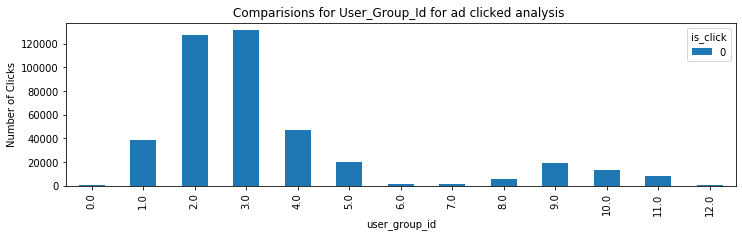

Text(0, 0.5, 'Number of Clicks')

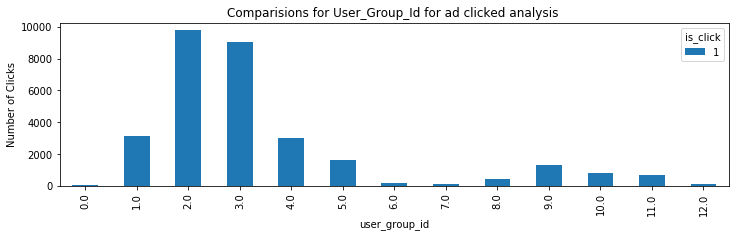

In [308]:
ad_click[ad_click['is_click']==0].groupby(['user_group_id','is_click']).size().unstack().plot(kind='bar', title="Comparisions for User_Group_Id for ad clicked analysis ", figsize=(12,3))
plt.xlabel('user_group_id')
plt.ylabel('Number of Clicks')
plt.show() 

ad_click[ad_click['is_click']==1].groupby(['user_group_id','is_click']).size().unstack().plot(kind='bar', title="Comparisions for User_Group_Id for ad clicked analysis ", figsize=(12,3))
plt.xlabel('user_group_id')
plt.ylabel('Number of Clicks')

## Missing Value Treatments

#### Number of Null Values in the Dataset

In [309]:
ad_click.isnull().sum()

session_id                     0
user_id                        0
product                        0
campaign_id                    0
webpage_id                     0
product_category_1             0
product_category_2        365854
user_group_id              18243
gender                     18243
age_level                  18243
user_depth                 18243
city_development_index    125129
var_1                          0
is_click                       0
year                           0
month                          0
day                            0
hour                           0
minutes                        0
dtype: int64

#### Creating dummies for Gender and Product 

In [310]:
gender = pd.get_dummies(ad_click['gender'])
product_names= pd.get_dummies(ad_click['product'])
ad_click = pd.concat([ad_click, product_names,gender], axis = 1)
ad_click.head()

,session_id,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,...,C,D,E,F,G,H,I,J,Female,Male
0,140690,858557,C,359520,13787,4,NaN,10.0,Female,4.0,...,1,0,0,0,0,0,0,0,1,0
1,333291,243253,C,105960,11085,5,NaN,8.0,Female,2.0,...,1,0,0,0,0,0,0,0,1,0
2,129781,243253,C,359520,13787,4,NaN,8.0,Female,2.0,...,1,0,0,0,0,0,0,0,1,0
3,464848,1097446,I,359520,13787,3,NaN,3.0,Male,3.0,...,0,0,0,0,0,0,1,0,0,1
4,90569,663656,C,405490,60305,3,NaN,2.0,Male,2.0,...,1,0,0,0,0,0,0,0,0,1


In [311]:
#Getting the correlation table
ad_click.corr()

,session_id,user_id,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,age_level,user_depth,city_development_index,...,C,D,E,F,G,H,I,J,Female,Male
session_id,1.000000,0.009265,-0.245661,-0.253621,-0.040190,-0.192477,0.043984,0.064951,-0.000137,-0.001072,...,-0.399152,0.008197,0.131329,-0.095544,-0.015734,0.295115,-0.004115,0.115239,0.018677,-0.016048
user_id,0.009265,1.000000,-0.009227,-0.022056,0.031165,0.015698,0.045024,0.047687,-0.011238,-0.034073,...,-0.001407,0.009464,0.008718,-0.000560,-0.001079,0.002503,-0.012504,-0.011441,0.029703,-0.022278
campaign_id,-0.245661,-0.009227,1.000000,0.606313,-0.113342,0.222252,-0.028817,-0.063227,-0.023217,0.023914,...,0.291572,-0.173261,-0.207732,0.079949,-0.177641,0.018840,-0.100442,0.070340,-0.001507,-0.003098
webpage_id,-0.253621,-0.022056,0.606313,1.000000,-0.280598,-0.157034,-0.087625,-0.119225,0.010909,-0.013158,...,0.101226,-0.144255,-0.097469,0.128134,-0.028470,-0.052939,0.016707,0.123956,-0.043445,0.031055
product_category_1,-0.040190,0.031165,-0.113342,-0.280598,1.000000,0.107853,0.093174,0.152602,0.002871,0.021651,...,0.310479,0.130974,-0.265860,-0.065014,0.043989,0.160009,-0.285837,-0.232310,0.034412,-0.005166
product_category_2,-0.192477,0.015698,0.222252,-0.157034,0.107853,1.000000,0.175898,0.202951,-0.068418,0.127381,...,0.422735,0.166788,-0.052565,-0.023224,-0.199936,0.061487,-0.345070,0.131839,0.104113,-0.105877
user_group_id,0.043984,0.045024,-0.028817,-0.087625,0.093174,0.175898,1.000000,0.635146,-0.012627,0.043475,...,-0.017867,0.012536,-0.000221,0.011588,-0.013597,0.043959,-0.035602,-0.027052,0.902121,-0.902121
age_level,0.064951,0.047687,-0.063227,-0.119225,0.152602,0.202951,0.635146,1.000000,0.022386,0.002434,...,-0.009676,0.026285,0.012214,0.010615,-0.012424,0.041862,-0.054342,-0.046629,0.240353,-0.240353
user_depth,-0.000137,-0.011238,-0.023217,0.010909,0.002871,-0.068418,-0.012627,0.022386,1.000000,-0.055224,...,0.003178,0.010196,0.017074,-0.001497,0.012935,-0.019795,0.002395,0.005316,-0.028275,0.028275
city_development_index,-0.001072,-0.034073,0.023914,-0.013158,0.021651,0.127381,0.043475,0.002434,-0.055224,1.000000,...,-0.000800,-0.024111,-0.038915,0.005530,-0.010605,0.038075,-0.007679,0.004246,0.052679,-0.052679


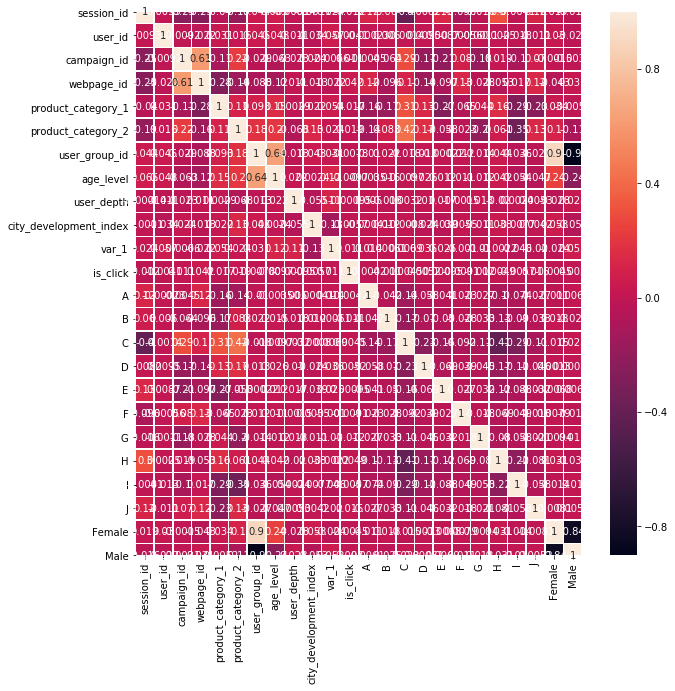

In [312]:
#Plotting the correlation 
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(ad_click.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

#### Treating the Null values for Product_Category_2 based on Product, Campaign_id, Webpage_id, Product_Category_1

In [313]:
#function to find the mode for each combination
def find_mode(x):
    m =pd.Series.mode(x)
    if m.shape[0]>=1:
        return m[0]
    else:
        return np.nan

In [314]:
#finding the mode for each combination
most_occuring = ad_click.groupby(['product','campaign_id','webpage_id','product_category_1']).agg(find_mode)

#merging the database and the mode table 
merge = pd.merge(ad_click, most_occuring, how='inner',on=['product','campaign_id','webpage_id','product_category_1'])

#replacing the N/A values
ad_click['product_category_2'] = ad_click['product_category_2'].fillna(value = merge['product_category_2_y'])  

Checking the null values for product_category_2

In [315]:
ad_click['product_category_2'].isnull().sum()

201926

#### Since, there are still null values which needs to be treated so we are considering product and product_category_1

In [316]:
#Calculating the mode for the combination
most_occur_1 = ad_click.groupby(['product','product_category_1']).agg(find_mode)

#merging the mode table with the database
merge1 = pd.merge(ad_click, most_occur_1, how = 'inner', on=['product','product_category_1'])

#Replacing the remaining null values in the table and checking for the null values
ad_click['product_category_2']=ad_click['product_category_2'].fillna(value = merge1['product_category_2_y'])
ad_click['product_category_2'].isnull().sum()

0

#### Treating the Null Values for Age_level using product and product_category_1

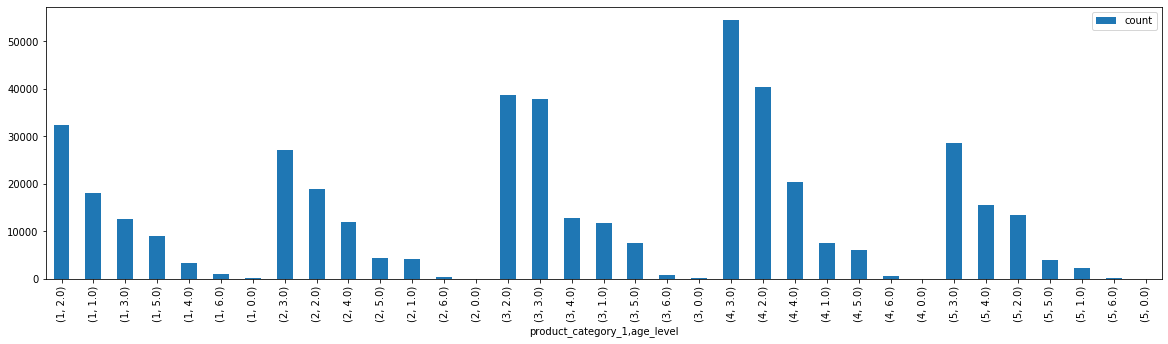

In [317]:
ad_click.groupby(['product_category_1']).agg(count = ('age_level', 'value_counts')).plot.bar(figsize = (20,5))

In [318]:
#Replacing the age_level in the data and checking the null values
ad_click['age_level'] = ad_click['age_level'].fillna(value = merge1['age_level_y'])
ad_click['age_level'].isnull().sum()

0

#### Replacing Null values of gender 

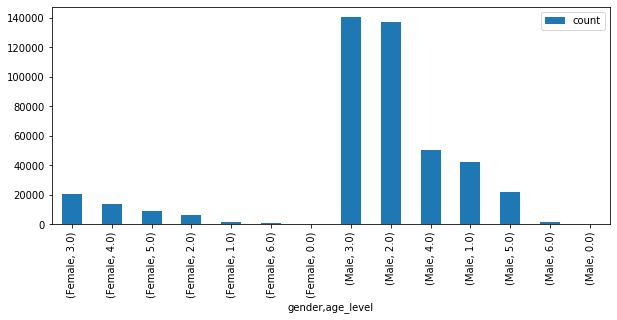

In [319]:
#plotting the graph for age_level and gender
ad_click.groupby(['gender']).agg(count = ('age_level','value_counts')).plot.bar(figsize = (10,4))


In [320]:
# We can see that mode value is Male so replacing it with Male
ad_click['gender']=ad_click['gender'].fillna('Male')

#Checking the Null Values
ad_click['gender'].isnull().sum()

0

#### Replacing Null Values for user_group_id using gender as they are correlated

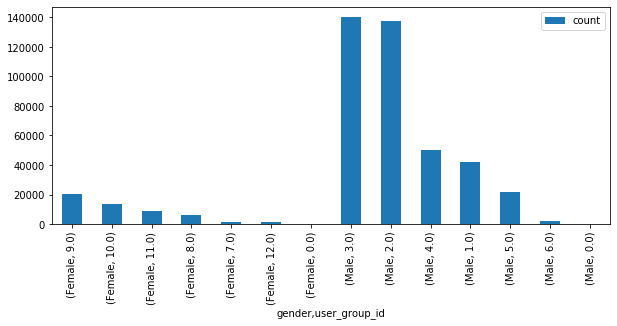

In [321]:
ad_click.groupby(['gender']).agg(count = ('user_group_id','value_counts')).plot.bar(figsize = (10,4))

In [322]:
#Replacing the value as 9 if the gender is Female and replacing the value with 3 if the gender is Male
d = {'Female':9,'Male':3}
ad_click['user_group_id']=ad_click['user_group_id'].fillna(ad_click['gender'].map(d))

#Checking for Null values
ad_click['user_group_id'].isnull().sum()

0

#### Replacing the Null values of user_group_id using var_1

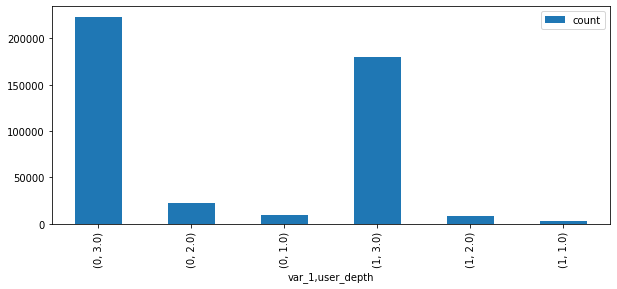

In [323]:
ad_click.groupby(['var_1']).agg(count = ('user_depth','value_counts')).plot.bar(figsize = (10,4))

In [324]:
#Replacing the value with 3 as it the mode
ad_click['user_depth']=ad_click['user_depth'].fillna(3)

#Checking for Null values
ad_click['user_depth'].isnull().sum()

0

#### Replacing the Null values of city_development_index using var_1

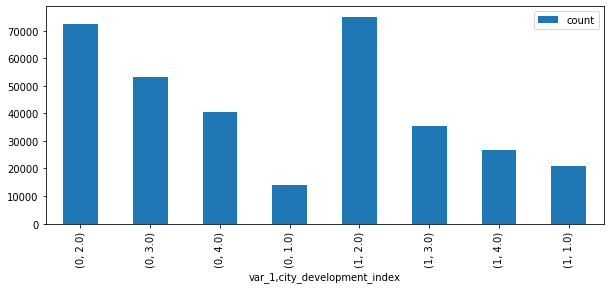

In [325]:
ad_click.groupby(['var_1']).agg(count = ('city_development_index','value_counts')).plot.bar(figsize = (10,4))

In [326]:
#Replacing the value with 2
ad_click['city_development_index'].fillna(2,inplace = True)

#Checking for null values
ad_click['city_development_index'].isnull().sum()

0

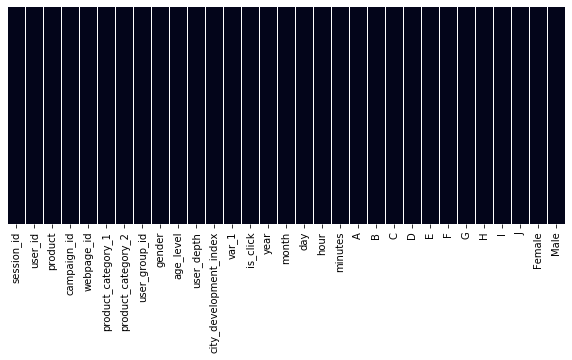

In [327]:
#Chcecking null values in the data
fig, ax = plt.subplots(figsize=(10,4))
sns.heatmap(ad_click.isna(),yticklabels=False,cbar=False)

In [328]:
#Dropping the dummies
ad_click=ad_click.drop(['Female','Male'],axis=1)

In [329]:
# Creating dummies for Gender after replacing the values
gender_names= pd.get_dummies(ad_click['gender'])
ad_click = pd.concat([ad_click, gender_names], axis = 1)

ad_click.columns

Index(['session_id', 'user_id', 'product', 'campaign_id', 'webpage_id',
       'product_category_1', 'product_category_2', 'user_group_id', 'gender',
       'age_level', 'user_depth', 'city_development_index', 'var_1',
       'is_click', 'year', 'month', 'day', 'hour', 'minutes', 'A', 'B', 'C',
       'D', 'E', 'F', 'G', 'H', 'I', 'J', 'Female', 'Male'],
      dtype='object')

### Getting the features and target 

In [330]:
X = ad_click.drop(['is_click','gender','year','month','day'], axis = 1).iloc[:,3:]
y = ad_click['is_click']

### Seperating the train and test

In [331]:
X_train, X_test, y_train, y_test = train_test_split(X,y) 

### Function for Plotting the ROC Curve

In [332]:
def roccurve(X_test,y_test,model):
    lr_probs = model.predict_proba(X_test)
    ns_probs = [0 for _ in range(len(y_test))]
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]
    # calculate scores
    lr_auc = roc_auc_score(y_test, lr_probs)
    ns_auc = roc_auc_score(y_test, ns_probs)
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()
    return lr_auc, ns_auc

### Function for Plotting the Confusion Matrix

In [333]:
def plot_confusion_matrix(cm,target_names,title='Confusion matrix',cmap=None,normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(6, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        
        
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

            plt.tight_layout()
    plt.xlim(-0.5, len(np.unique(y))-0.5) # ADD THIS LINE
    plt.ylim(len(np.unique(y))-0.5, -0.5)
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

## Logistic Regression

In [334]:
lr = LogisticRegression(solver='liblinear')
lr_fit = lr.fit(X_train,y_train)
lr_model = lr_fit.predict(X_test)

#### Getting the accuracy score, confusion matrix and classification report for logistic regression

In [335]:
precision_lr,recall_lr,fscore_lr,support_lr=score(y_test, lr_model,average='macro')
acc_lr= accuracy_score(y_test, lr_model)
cm_lr = confusion_matrix(y_test, lr_model)

print('Accuracy score for logistic regression:\n',acc_lr)
print('\n')
print('Confusion matrix for logistic regression:\n',cm_lr)
print('\n')
print('Classification Report for logistic regression:\n', classification_report(y_test, lr_model))


C:\Users\rishv\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy score for logistic regression:
 0.9316716023587716


Confusion matrix for logistic regression:
 [[107909      0]
 [  7914      0]]


Classification Report for logistic regression:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96    107909
           1       0.00      0.00      0.00      7914

    accuracy                           0.93    115823
   macro avg       0.47      0.50      0.48    115823
weighted avg       0.87      0.93      0.90    115823



#### Plotting of Confusion Matrix

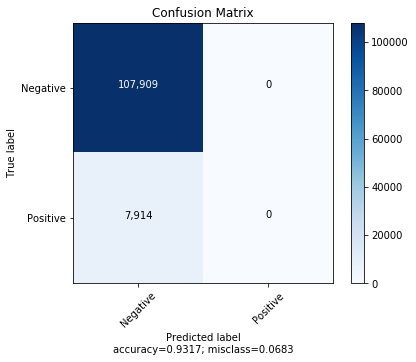

In [336]:
plot_confusion_matrix(cm= np.array(cm_lr),normalize = False, target_names = ['Negative', 'Positive'], title  = "Confusion Matrix")

#### ROC Curve for Logistic Regresion

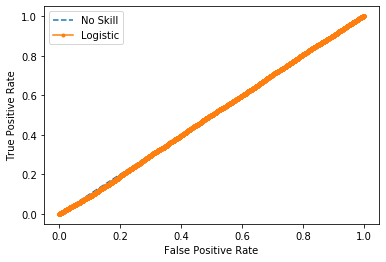

Logistic: ROC AUC=0.497
No Skill: ROC AUC=0.500


In [337]:
lr_auc, ns_auc = roccurve(X_test,y_test,lr)
print('Logistic: ROC AUC=%.3f' % (lr_auc))
print('No Skill: ROC AUC=%.3f' % (ns_auc))


### Gradient Boosting Regression

In [338]:
gbm = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
gbm_fit = gbm.fit(X_train,y_train)
gbm_model = gbm_fit.predict(X_test)

#### Calculating the accuracy score, confusion matrix and classification report

In [339]:
precision_gbm,recall_gbm,fscore_gbm,support_gbm=score(y_test, gbm_model,average='macro')
acc_gbm= accuracy_score(y_test, gbm_model)
cm_gbm = confusion_matrix(y_test, gbm_model)
print('Accuracy score for GBM:\n',acc_gbm)
print('\n')
print('Confusion matrix for GBM:\n',cm_gbm)
print('\n')
print('Classification Report for GBM:\n', classification_report(y_test, gbm_model))

C:\Users\rishv\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy score for GBM:
 0.9316716023587716


Confusion matrix for GBM:
 [[107909      0]
 [  7914      0]]


Classification Report for GBM:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96    107909
           1       0.00      0.00      0.00      7914

    accuracy                           0.93    115823
   macro avg       0.47      0.50      0.48    115823
weighted avg       0.87      0.93      0.90    115823



#### Plotting of Confusion Matrix

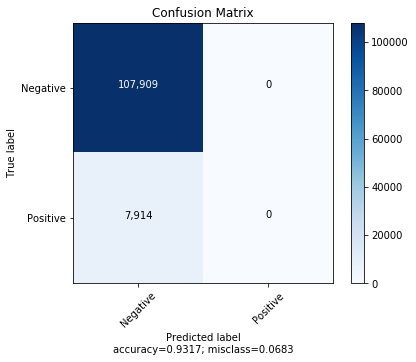

In [340]:
plot_confusion_matrix(cm= np.array(cm_gbm),normalize = False, target_names = ['Negative', 'Positive'], title  = "Confusion Matrix")

#### ROC Curve for GBM

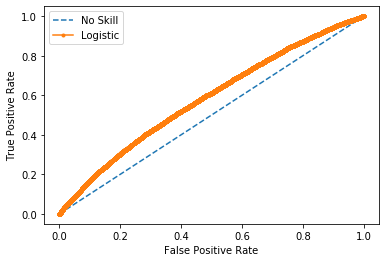

GBM: ROC AUC=0.584
No Skill: ROC AUC=0.500


In [341]:
gbm_auc, ns_auc = roccurve(X_test,y_test,gbm)
print('GBM: ROC AUC=%.3f' % (gbm_auc))
print('No Skill: ROC AUC=%.3f' % (ns_auc))

### Decision Tree

In [346]:
dt = tree.DecisionTreeClassifier()
dt_fit = dt.fit(X_train, y_train)
dt_model = dt_fit.predict(X_test)

#### Getting the accuracy score, confusion matrix and classification report for Decision Tree

In [347]:
precision_dt,recall_dt,fscore_dt,support_dt=score(y_test, dt_model,average='macro')
acc_dt = accuracy_score(y_test, dt_model)
cm_dt = confusion_matrix(y_test, dt_model)

print('Accuracy score for Decison Tree:\n',acc_dt)
print('\n')
print('Confusion matrix for Decison Tree:\n',cm_dt)
print('\n')
print('Classification report for Decison Tree:\n',classification_report(y_test, dt_model))

Accuracy score for Decison Tree:
 0.8690588225136631


Confusion matrix for Decison Tree:
 [[100019   7890]
 [  7276    638]]


Classification report for Decison Tree:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93    107909
           1       0.07      0.08      0.08      7914

    accuracy                           0.87    115823
   macro avg       0.50      0.50      0.50    115823
weighted avg       0.87      0.87      0.87    115823



#### Plotting of Confusion Matrix

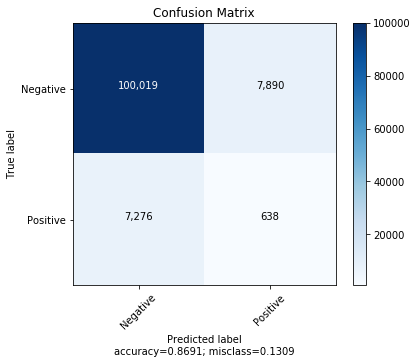

In [348]:
plot_confusion_matrix(cm= np.array(cm_dt),normalize = False, target_names = ['Negative', 'Positive'], title  = "Confusion Matrix")

#### ROC Curve for Decision Tree

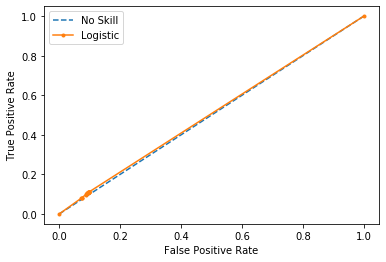

Decision Tree: ROC AUC=0.507
No Skill: ROC AUC=0.500


In [349]:
dt_auc, ns_auc = roccurve(X_test,y_test,dt)
print('Decision Tree: ROC AUC=%.3f' % (dt_auc))
print('No Skill: ROC AUC=%.3f' % (ns_auc))

## Random Forest

In [350]:
rfc = RandomForestClassifier()
rfc_fit = rfc.fit(X_train, y_train)
rfc_model = rfc_fit.predict(X_test)

#### Getting the accuracy score, confusion matrix and classification report

In [351]:
precision_rfc,recall_rfc,fscore_rfc,support_rfc=score(y_test, rfc_model,average='macro')
acc_rfc = accuracy_score(y_test, rfc_model)
cm_rfc = confusion_matrix(y_test, rfc_model)

print('Accuracy score for Random Forest:\n',acc_rfc)
print('\n')
print('Confusion matrix for Random Forest:\n',cm_rfc)
print('\n')
print('Classification report for Random Forest:\n',classification_report(y_test, rfc_model))


Accuracy score for Random Forest:
 0.9185135940184592


Confusion matrix for Random Forest:
 [[106214   1695]
 [  7743    171]]


Classification report for Random Forest:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96    107909
           1       0.09      0.02      0.03      7914

    accuracy                           0.92    115823
   macro avg       0.51      0.50      0.50    115823
weighted avg       0.87      0.92      0.89    115823



#### Plotting of Confusion Matrix

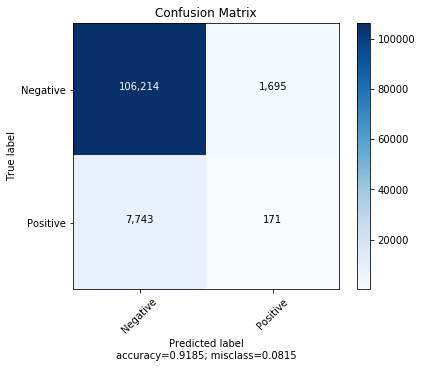

In [352]:
plot_confusion_matrix(cm= np.array(cm_rfc),normalize = False, target_names = ['Negative', 'Positive'], title  = "Confusion Matrix")

#### ROC Curve for Random Forest

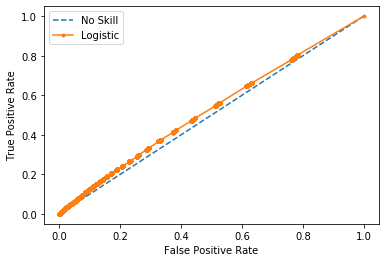

Random Forest Tree: ROC AUC=0.526
No Skill: ROC AUC=0.500


In [353]:
rfc_auc, ns_auc = roccurve(X_test,y_test,rfc)
print('Random Forest Tree: ROC AUC=%.3f' % (rfc_auc))
print('No Skill: ROC AUC=%.3f' % (ns_auc))

### The number of successful ad-clicks(1) is very small compared to unsuccessful ad-clicks(0),hence the precision is very small for the prediction of 1's we are trying undersampling the majority data i.e(0)

#### Undersampling and redefining the X, y and splitting the data

In [354]:
X = ad_click.drop(['is_click','gender','year','month','day'], axis = 1).iloc[:,3:]
y = ad_click['is_click']

In [355]:
under = RandomUnderSampler(sampling_strategy=0.5)
X, y = under.fit_resample(X, y)

In [356]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 1 ,stratify=y) 

### Logistic Regression after Undersampling

In [357]:
lr = LogisticRegression(class_weight='balanced',solver='liblinear')
lr_fit = lr.fit(X_train,y_train)
lr_model = lr_fit.predict(X_test)

#### Calculating the accuracy, confusion matrix and classification_report

In [358]:
precision_lr_u,recall_lr_u,fscore_lr_u,support_lr_u=score(y_test, lr_model,average='macro')
acc_lr_u = accuracy_score(y_test, lr_model)
cm_lr_u = confusion_matrix(y_test, lr_model)

print('Accuracy score for logistic regression:\n',acc_lr_u)
print('\n')
print('Confusion matrix for logistic regression:\n',cm_lr_u)
print('\n')
print('Classification Report for logistic regression:\n', classification_report(y_test, lr_model))

Accuracy score for logistic regression:
 0.518192779629761


Confusion matrix for logistic regression:
 [[9138 9661]
 [3925 5474]]


Classification Report for logistic regression:
               precision    recall  f1-score   support

           0       0.70      0.49      0.57     18799
           1       0.36      0.58      0.45      9399

    accuracy                           0.52     28198
   macro avg       0.53      0.53      0.51     28198
weighted avg       0.59      0.52      0.53     28198



#### Plotting of Confusion Matrix

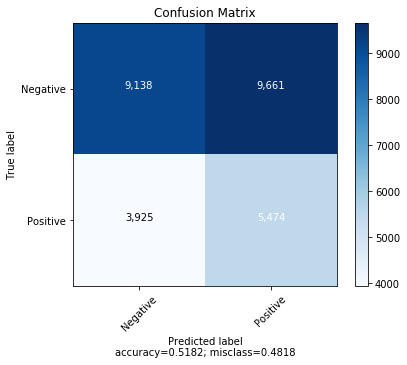

In [359]:
plot_confusion_matrix(cm= np.array(cm_lr_u),normalize = False, target_names = ['Negative', 'Positive'], title  = "Confusion Matrix")

#### ROC Curve for Logistic Regression after Undersampling

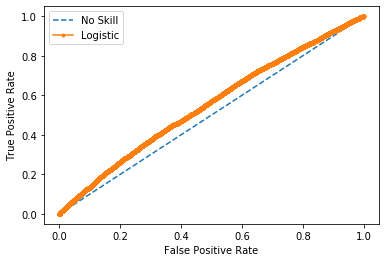

Logistic: ROC AUC=0.552
No Skill: ROC AUC=0.500


In [360]:
lr_auc, ns_auc = roccurve(X_test,y_test,lr)
print('Logistic: ROC AUC=%.3f' % (lr_auc))
print('No Skill: ROC AUC=%.3f' % (ns_auc))

### Gradient Boosting Regression after Undersampling

In [361]:
gbm = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
gbm_fit = gbm.fit(X_train,y_train)
gbm_model = gbm_fit.predict(X_test)

#### Calculating the accuracy, confusion matrix and classification_report

In [362]:
precision_gbm_u,recall_gbm_u,fscore_gbm_u,support_gbm_u=score(y_test, gbm_model,average='macro')
acc_gbm_u= accuracy_score(y_test, gbm_model)
cm_gbm_u = confusion_matrix(y_test, gbm_model)
print('Accuracy score for GBM:\n',acc_gbm_u)
print('\n')
print('Confusion matrix for GBM:\n',cm_gbm_u)
print('\n')
print('Classification Report for GBM:\n', classification_report(y_test, gbm_model))


Accuracy score for GBM:
 0.6667848783601674


Confusion matrix for GBM:
 [[18799     0]
 [ 9396     3]]


Classification Report for GBM:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80     18799
           1       1.00      0.00      0.00      9399

    accuracy                           0.67     28198
   macro avg       0.83      0.50      0.40     28198
weighted avg       0.78      0.67      0.53     28198



#### Plotting of Confusion Matrix

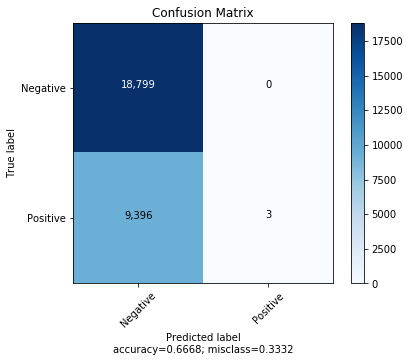

In [363]:
plot_confusion_matrix(cm= np.array(cm_gbm_u),normalize = False, target_names = ['Negative', 'Positive'], title  = "Confusion Matrix")

#### ROC Curve after Undersampling

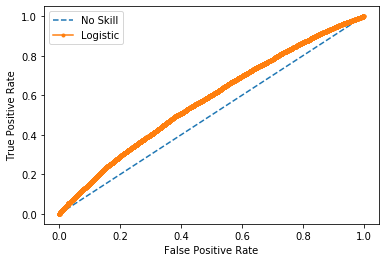

GBM: ROC AUC=0.575
No Skill: ROC AUC=0.500


In [364]:
gbm_auc, ns_auc = roccurve(X_test,y_test,gbm)
print('GBM: ROC AUC=%.3f' % (gbm_auc))
print('No Skill: ROC AUC=%.3f' % (ns_auc))

### Decision Tree after Undersampling

In [369]:
dt = tree.DecisionTreeClassifier(class_weight='balanced')
dt_fit = dt.fit(X_train, y_train)
dt_model = dt_fit.predict(X_test)

#### Getting the accuracy score, confusion matrix and classification report for Decision Tree

In [370]:
precision_dt_u,recall_dt_u,fscore_dt_u,support_dt_u=score(y_test, dt_model,average='macro')
acc_dt_u = accuracy_score(y_test, dt_model)
cm_dt_u = confusion_matrix(y_test, dt_model)

print('Accuracy score for Decison Tree:\n',acc_dt_u)
print('\n')
print('Confusion matrix for Decison Tree:\n',cm_dt_u)
print('\n')
print('Classification report for Decison Tree:\n',classification_report(y_test, dt_model))


Accuracy score for Decison Tree:
 0.5621675296120292


Confusion matrix for Decison Tree:
 [[12348  6451]
 [ 5895  3504]]


Classification report for Decison Tree:
               precision    recall  f1-score   support

           0       0.68      0.66      0.67     18799
           1       0.35      0.37      0.36      9399

    accuracy                           0.56     28198
   macro avg       0.51      0.51      0.51     28198
weighted avg       0.57      0.56      0.57     28198



#### Plotting of Confusion Matrix

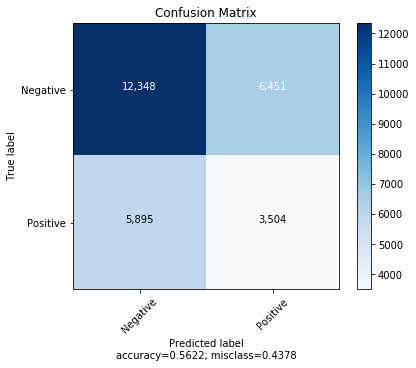

In [371]:
plot_confusion_matrix(cm= np.array(cm_dt_u),normalize = False, target_names = ['Negative', 'Positive'], title  = "Confusion Matrix")

#### ROC Curve for Decision Tree after Undersampling

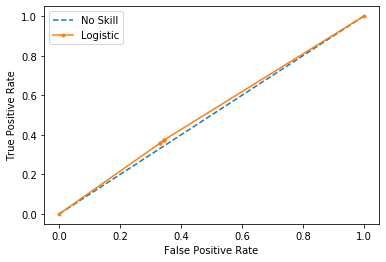

Decision Tree: ROC AUC=0.515
No Skill: ROC AUC=0.500


In [372]:
dt_auc, ns_auc = roccurve(X_test,y_test,dt)
print('Decision Tree: ROC AUC=%.3f' % (dt_auc))
print('No Skill: ROC AUC=%.3f' % (ns_auc))

### Random Forest after Undersampling

In [373]:
rfc=RandomForestClassifier(n_estimators=100,class_weight='balanced')
rfc_fit = rfc.fit(X_train,y_train)
rfc_model=rfc_fit.predict(X_test)

#### Calculating the accuracy, confusion matrix, classification matrix

In [374]:
precision_rfc_u,recall_rfc_u,fscore_rfc_u,support_rfc_u = score(y_test, rfc_model,average='macro')
acc_rfc_u = accuracy_score(y_test, rfc_model)
cm_rfc_u = confusion_matrix(y_test, rfc_model)

print('Accuracy score for Random Forest:\n',acc_rfc_u)
print('\n')
print('Confusion matrix for Random Forest:\n',cm_rfc_u)
print('\n')
print('Classification report for Random Forest:\n',classification_report(y_test, rfc_model))


Accuracy score for Random Forest:
 0.6201149017660827


Confusion matrix for Random Forest:
 [[15300  3499]
 [ 7213  2186]]


Classification report for Random Forest:
               precision    recall  f1-score   support

           0       0.68      0.81      0.74     18799
           1       0.38      0.23      0.29      9399

    accuracy                           0.62     28198
   macro avg       0.53      0.52      0.52     28198
weighted avg       0.58      0.62      0.59     28198



#### Plotting for Confusion Matrix

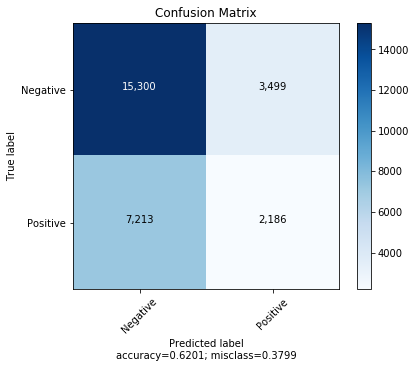

In [375]:
plot_confusion_matrix(cm= np.array(cm_rfc_u),normalize = False, target_names = ['Negative', 'Positive'], title  = "Confusion Matrix")

#### ROC Curve for Random Forest after Undersampling

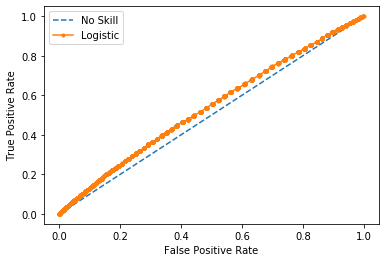

Random Forest Tree: ROC AUC=0.540
No Skill: ROC AUC=0.500


In [376]:
rfc_auc, ns_auc = roccurve(X_test,y_test,rfc)
print('Random Forest Tree: ROC AUC=%.3f' % (rfc_auc))
print('No Skill: ROC AUC=%.3f' % (ns_auc))

### Oversampling minority data (1) 

In [377]:
X = ad_click.drop(['is_click','gender','year','month','day'], axis = 1).iloc[:,3:]
y = ad_click['is_click']

In [378]:
over = SMOTE()
X, y = over.fit_resample(X, y)

In [379]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 1 ,stratify=y) 

### Logistic Regression after Oversampling

In [380]:
lr = LogisticRegression(class_weight='balanced',solver='liblinear')
lr_fit = lr.fit(X_train,y_train)
lr_model = lr_fit.predict(X_test)

#### Calculate the Accuracy score, confusion matrix and classification report after oversampling

In [381]:
precision_lr_o,recall_lr_o,fscore_lr_o,support_lr_o = score(y_test, lr_model , average='macro')
acc_lr_o = accuracy_score(y_test, lr_model)
cm_lr_o = confusion_matrix(y_test, lr_model)

print('Accuracy score for logistic regression:\n',acc_lr_o)
print('\n')
print('Confusion matrix for logistic regression:\n',cm_lr_o)
print('\n')
print('Classification Report for logistic regression:\n', classification_report(y_test, lr_model))


Accuracy score for logistic regression:
 0.6229048986017224


Confusion matrix for logistic regression:
 [[79244 50344]
 [47390 82198]]


Classification Report for logistic regression:
               precision    recall  f1-score   support

           0       0.63      0.61      0.62    129588
           1       0.62      0.63      0.63    129588

    accuracy                           0.62    259176
   macro avg       0.62      0.62      0.62    259176
weighted avg       0.62      0.62      0.62    259176



#### Plotting for Confusion Matrix

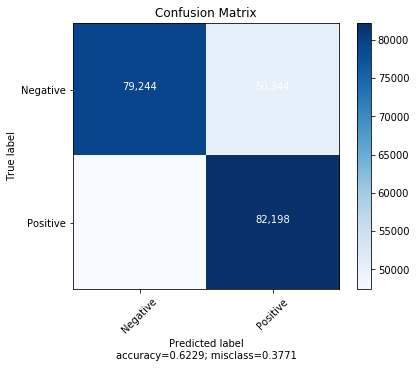

In [382]:
plot_confusion_matrix(cm= np.array(cm_lr_o),normalize = False, target_names = ['Negative', 'Positive'], title  = "Confusion Matrix")

#### ROC Curve after oversampling

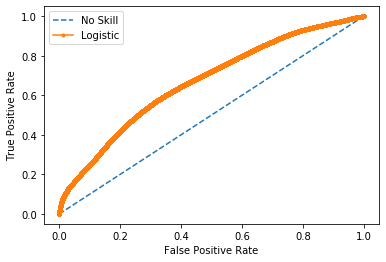

Logistic: ROC AUC=0.670
No Skill: ROC AUC=0.500


In [383]:
lr_auc, ns_auc = roccurve(X_test,y_test,lr)
print('Logistic: ROC AUC=%.3f' % (lr_auc))
print('No Skill: ROC AUC=%.3f' % (ns_auc))

#### Trying to improve the model by Hyperparameter Tuning

In [384]:
grid_values = {'penalty': ['l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}
grid_lr = GridSearchCV(lr, param_grid=grid_values, cv = 5)
grid_lr.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [385]:
print("best params = ", grid_lr.best_params_)
print("Accuracy on train data = ", grid_lr.best_score_*100)
a = grid_lr.best_params_
optimal_penalty = a.get('penalty')
optimal_c=a.get('C')

best params =  {'C': 0.1, 'penalty': 'l2'}
Accuracy on train data =  58.21967024053289


In [386]:
lr_optimal = LogisticRegression(solver='liblinear',C = optimal_c, penalty = optimal_penalty, class_weight='balanced')
lr_opt_fit = lr_optimal.fit(X_train,y_train)
lr_y_pred_opt= lr_opt_fit.predict(X_test)

#### Calculating the accuracy, confusion matrix and classification report

In [387]:
precision_lr_o_t,recall_lr_o_t,fscore_lr_o_t,support_lr_o_t = score(y_test, lr_y_pred_opt , average='macro')
acc_lr_o_t = accuracy_score(y_test, lr_y_pred_opt)
cm_lr_o_t = confusion_matrix(y_test, lr_y_pred_opt)

print('Accuracy score for logistic regression:\n',acc_lr_o_t)
print('\n')
print('Confusion matrix for logistic regression:\n',cm_lr_o_t)
print('\n')
print('Classification Report for logistic regression:\n', classification_report(y_test, lr_y_pred_opt))


Accuracy score for logistic regression:
 0.5904404728832917


Confusion matrix for logistic regression:
 [[76784 52804]
 [53344 76244]]


Classification Report for logistic regression:
               precision    recall  f1-score   support

           0       0.59      0.59      0.59    129588
           1       0.59      0.59      0.59    129588

    accuracy                           0.59    259176
   macro avg       0.59      0.59      0.59    259176
weighted avg       0.59      0.59      0.59    259176



#### Plotting for Confusion Matrix

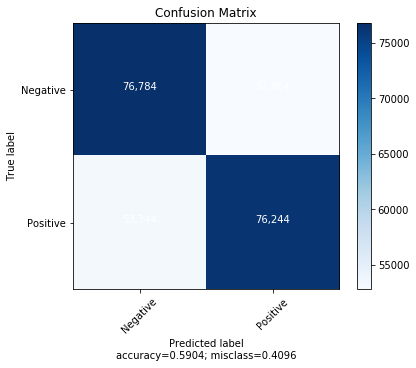

In [388]:
plot_confusion_matrix(cm= np.array(cm_lr_o_t),normalize = False, target_names = ['Negative', 'Positive'], title  = "Confusion Matrix")

#### ROC Curve

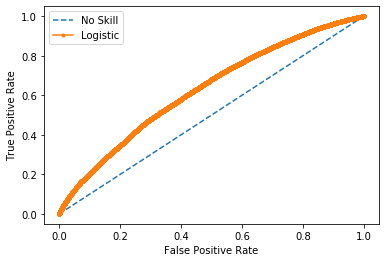

Logistic: ROC AUC=0.629
No Skill: ROC AUC=0.500


In [389]:
lr_auc, ns_auc = roccurve(X_test,y_test,lr_optimal)
print('Logistic: ROC AUC=%.3f' % (lr_auc))
print('No Skill: ROC AUC=%.3f' % (ns_auc))

### Decision Tree after Oversampling

In [390]:
dt = tree.DecisionTreeClassifier(class_weight='balanced')
dt_fit = dt.fit(X_train, y_train)
dt_model = dt_fit.predict(X_test)

#### Calculating accuracy score, confusion matrix and classification report

In [391]:
precision_dt_o,recall_dt_o,fscore_dt_o,support_dt_o = score(y_test, dt_model , average='macro')
acc_dt_o = accuracy_score(y_test, dt_model)
cm_dt_o = confusion_matrix(y_test, dt_model)

print('Accuracy score for Decison Tree:\n',acc_dt_o)
print('\n')
print('Confusion matrix for Decison Tree:\n',cm_dt_o)
print('\n')
print('Classification report for Decison Tree:\n',classification_report(y_test, dt_model))


Accuracy score for Decison Tree:
 0.9213275920609934


Confusion matrix for Decison Tree:
 [[119011  10577]
 [  9813 119775]]


Classification report for Decison Tree:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92    129588
           1       0.92      0.92      0.92    129588

    accuracy                           0.92    259176
   macro avg       0.92      0.92      0.92    259176
weighted avg       0.92      0.92      0.92    259176



#### Plotting for Confusion Matrix

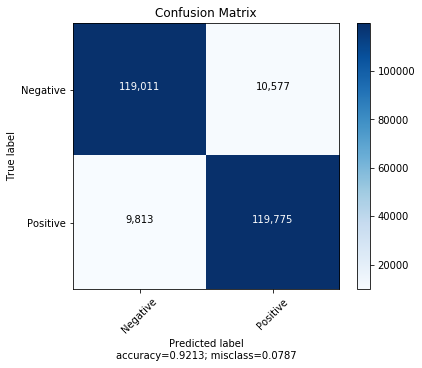

In [392]:
plot_confusion_matrix(cm= np.array(cm_dt_o),normalize = False, target_names = ['Negative', 'Positive'], title  = "Confusion Matrix")

#### ROC Curve for Decision Tree

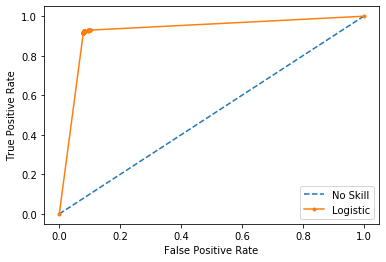

Decision Tree: ROC AUC=0.924
No Skill: ROC AUC=0.500


In [393]:
dt_auc, ns_auc = roccurve(X_test,y_test,dt)
print('Decision Tree: ROC AUC=%.3f' % (dt_auc))
print('No Skill: ROC AUC=%.3f' % (ns_auc))


#### Improving the model by tuning the Hyperparameters for DecisionTree

In [394]:
criterion = ['gini','entropy']
max_depth = [1,3,5,None]
splitter = ['best','random']
grid = GridSearchCV(estimator = dt, cv = 3, param_grid = dict(criterion = criterion, max_depth=max_depth,splitter=splitter))
grid.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'

In [395]:
print("best params = ", grid.best_params_)
print("Accuracy on train data = ", grid.best_score_*100)
a = grid.best_params_
optimal_criterion = a.get('criterion')
optimal_max_depth=a.get('max_depth')
optimal_splitter=a.get('splitter')


best params =  {'criterion': 'entropy', 'max_depth': None, 'splitter': 'best'}
Accuracy on train data =  91.58883755436919


In [396]:
dt_optimal = tree.DecisionTreeClassifier(criterion = optimal_criterion,max_depth=1,splitter=optimal_splitter)
dt_optimal_fit = dt_optimal.fit(X_train,y_train)
y_predict_opt= dt_optimal_fit.predict(X_test)

#### Calculating the accuracy score, confusion matrix and classification report

In [397]:
precision_dt_o_t,recall_dt_o_t,fscore_dt_o_t,support_dt_o_t = score(y_test, y_predict_opt , average='macro')
acc_dt_o_t = accuracy_score(y_test, y_predict_opt)
cm_dt_o_t = confusion_matrix(y_test, y_predict_opt)

print('Accuracy score for Decison Tree:\n',acc_dt_o_t)
print('\n')
print('Confusion matrix for Decison Tree:\n',cm_dt_o_t)
print('\n')
print('Classification report for Decison Tree:\n',classification_report(y_test, y_predict_opt))


Accuracy score for Decison Tree:
 0.57829428650801


Confusion matrix for Decison Tree:
 [[54443 75145]
 [34151 95437]]


Classification report for Decison Tree:
               precision    recall  f1-score   support

           0       0.61      0.42      0.50    129588
           1       0.56      0.74      0.64    129588

    accuracy                           0.58    259176
   macro avg       0.59      0.58      0.57    259176
weighted avg       0.59      0.58      0.57    259176



#### ROC Curve 

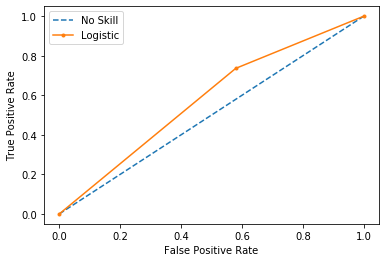

Decision Tree: ROC AUC=0.578
No Skill: ROC AUC=0.500


In [398]:
dt_auc, ns_auc = roccurve(X_test,y_test,dt_optimal)
print('Decision Tree: ROC AUC=%.3f' % (dt_auc))
print('No Skill: ROC AUC=%.3f' % (ns_auc))

### GBM After Oversampling

In [399]:
gbm = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
gbm_fit = gbm.fit(X_train,y_train)
gbm_model = gbm_fit.predict(X_test)

#### Calculating the accuracy score, confusion matrix and classification report

In [400]:
precision_gbm_o,recall_gbm_o,fscore_gbm_o,support_gbm_o=score(y_test, gbm_model,average='macro')
acc_gbm_o= accuracy_score(y_test, gbm_model)
cm_gbm_o = confusion_matrix(y_test, gbm_model)

print('Accuracy score for GBM:\n',acc_gbm_o)
print('\n')
print('Confusion matrix for GBM:\n',cm_gbm_o)
print('\n')
print('Classification Report for GBM:\n', classification_report(y_test, gbm_model))


Accuracy score for GBM:
 0.8644125999320925


Confusion matrix for GBM:
 [[123354   6234]
 [ 28907 100681]]


Classification Report for GBM:
               precision    recall  f1-score   support

           0       0.81      0.95      0.88    129588
           1       0.94      0.78      0.85    129588

    accuracy                           0.86    259176
   macro avg       0.88      0.86      0.86    259176
weighted avg       0.88      0.86      0.86    259176



#### Plotting for Confusion Matrix

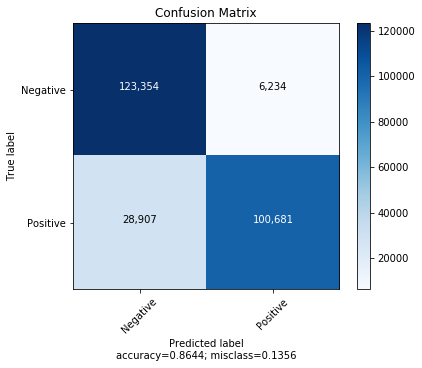

In [401]:
plot_confusion_matrix(cm= np.array(cm_gbm_o),normalize = False, target_names = ['Negative', 'Positive'], title  = "Confusion Matrix")

#### ROC Curve

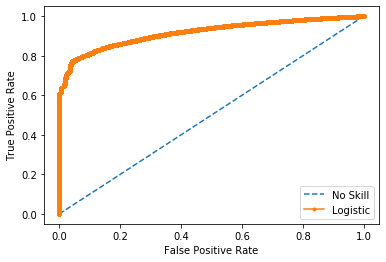

GBM: ROC AUC=0.918
No Skill: ROC AUC=0.500


In [402]:
gbm_auc, ns_auc = roccurve(X_test,y_test,gbm)
print('GBM: ROC AUC=%.3f' % (gbm_auc))
print('No Skill: ROC AUC=%.3f' % (ns_auc))

### Random Forest after Oversampling

In [407]:
rfc=RandomForestClassifier(n_estimators=100,class_weight='balanced')
rfc_fit = rfc.fit(X_train,y_train)
rfc_model=rfc_fit.predict(X_test)

#### Calculating the accuracy score, confusion matrix and classification report

In [408]:
precision_rfc_o,recall_rfc_o,fscore_rfc_o,support_rfc_o = score(y_test, rfc_model , average='macro')
acc_rfc_o = accuracy_score(y_test, rfc_model)
cm_rfc_o = confusion_matrix(y_test, rfc_model)

print('Accuracy score for Random Forest:\n',acc_rfc_o)
print('\n')
print('Confusion matrix for Random Forest:\n',cm_rfc_o)
print('\n')
print('Classification report for Random Forest:\n',classification_report(y_test, rfc_model))


Accuracy score for Random Forest:
 0.9470668580424113


Confusion matrix for Random Forest:
 [[125513   4075]
 [  9644 119944]]


Classification report for Random Forest:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95    129588
           1       0.97      0.93      0.95    129588

    accuracy                           0.95    259176
   macro avg       0.95      0.95      0.95    259176
weighted avg       0.95      0.95      0.95    259176



#### Plotting for Confusion Matrix

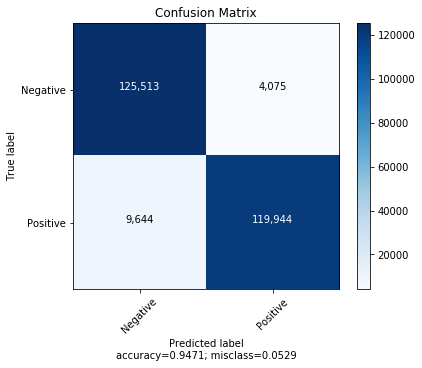

In [409]:
plot_confusion_matrix(cm= np.array(cm_rfc_o),normalize = False, target_names = ['Negative', 'Positive'], title  = "Confusion Matrix")

#### ROC Curve

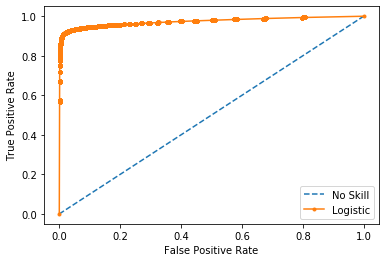

Random Forest Tree: ROC AUC=0.974
No Skill: ROC AUC=0.500


In [410]:
rfc_auc, ns_auc = roccurve(X_test,y_test,rfc)
print('Random Forest Tree: ROC AUC=%.3f' % (rfc_auc))
print('No Skill: ROC AUC=%.3f' % (ns_auc))

### Pretty Table 

In [411]:
pt = PrettyTable()
pt.field_names = ['Model','Precision', 'Recall','F-score','Accuracy']
pt.add_row(['Logistic Regression',precision_lr*100,recall_lr*100,fscore_lr*100,acc_lr*100])
pt.add_row(['Gradient Boosting',precision_gbm*100,recall_gbm*100,fscore_gbm*100,acc_gbm*100])
pt.add_row(['Decission Tree',precision_dt*100,recall_dt*100,fscore_dt*100,acc_dt*100])
pt.add_row(['Random Forest',precision_rfc*100,recall_rfc*100,fscore_rfc*100,acc_rfc*100])
print('Results for Basic Model')
print(pt)

Results for Basic Model
+---------------------+--------------------+--------------------+--------------------+-------------------+
|        Model        |     Precision      |       Recall       |      F-score       |      Accuracy     |
+---------------------+--------------------+--------------------+--------------------+-------------------+
| Logistic Regression | 46.58358011793858  |        50.0        | 48.23136609872527  | 93.16716023587716 |
|  Gradient Boosting  | 46.58358011793858  |        50.0        | 48.23136609872527  | 93.16716023587716 |
|    Decission Tree   | 50.34996719605003  | 50.37497326116094  | 50.35667314233812  | 86.90588225136631 |
|    Random Forest    | 51.184659486978035 | 50.294979931107676 | 49.621506741564396 | 91.85135940184593 |
+---------------------+--------------------+--------------------+--------------------+-------------------+


In [412]:
pt_u = PrettyTable()
pt_u.field_names = ['Model','Precision', 'Recall','F-score','Accuracy']
pt_u.add_row(['Logistic Regression',precision_lr_u*100,recall_lr_u*100,fscore_lr_u*100,acc_lr_u*100])
pt_u.add_row(['Gradient Boosting',precision_gbm_u*100,recall_gbm_u*100,fscore_gbm_u*100,acc_gbm_u*100])
pt_u.add_row(['Decission Tree',precision_dt_u*100,recall_dt_u*100,fscore_dt_u*100,acc_dt_u*100])
pt_u.add_row(['Random Forest',precision_rfc_u*100,recall_rfc_u*100,fscore_rfc_u*100,acc_rfc_u*100])
print('Results after Undersampling')
print(pt_u)

Results after Undersampling
+---------------------+-------------------+-------------------+--------------------+--------------------+
|        Model        |     Precision     |       Recall      |      F-score       |      Accuracy      |
+---------------------+-------------------+-------------------+--------------------+--------------------+
| Logistic Regression | 53.06056307491678 | 53.42460344269172 | 50.99182590618627  | 51.819277962976095 |
|  Gradient Boosting  | 83.33747118283384 | 50.01595914458985 | 40.034887208373945 | 66.67848783601674  |
|    Decission Tree   | 51.44231429196555 | 51.48245333692648 | 51.43991763282908  | 56.21675296120292  |
|    Random Forest    | 53.20640032040903 | 52.32255060889894 | 51.52742113824345  | 62.01149017660828  |
+---------------------+-------------------+-------------------+--------------------+--------------------+


In [413]:
pt_o = PrettyTable()
pt_o.field_names = ['Model','Precision', 'Recall','F-score','Accuracy']
pt_o.add_row(['Logistic Regression',precision_lr_o*100,recall_lr_o*100,fscore_lr_o*100,acc_lr_o*100])
pt_o.add_row(['Gradient Boosting',precision_gbm_o*100,recall_gbm_o*100,fscore_gbm_o*100,acc_gbm_o*100])
pt_o.add_row(['Decission Tree',precision_dt_o*100,recall_dt_o*100,fscore_dt_o*100,acc_dt_o*100])
pt_o.add_row(['Random Forest',precision_rfc_o*100,recall_rfc_o*100,fscore_rfc_o*100,acc_rfc_o*100])
print('Results for Oversampling')
print(pt_o)

Results for Oversampling
+---------------------+-------------------+-------------------+-------------------+-------------------+
|        Model        |     Precision     |       Recall      |      F-score      |      Accuracy     |
+---------------------+-------------------+-------------------+-------------------+-------------------+
| Logistic Regression | 62.29687964641526 | 62.29048986017224 | 62.28559050720892 | 62.29048986017224 |
|  Gradient Boosting  |  87.5920180990721 | 86.44125999320926 | 86.33669551929214 | 86.44125999320926 |
|    Decission Tree   |  92.1342237154184 | 92.13275920609934 | 92.13269084274431 | 92.13275920609934 |
|    Random Forest    | 94.78940382668429 | 94.70668580424113 | 94.70424072405912 | 94.70668580424113 |
+---------------------+-------------------+-------------------+-------------------+-------------------+


In [414]:
pt_g = PrettyTable()
pt_g.field_names = ['Model','Precision', 'Recall','F-score','Accuracy']
pt_g.add_row(['Logistic Regression',precision_lr_o_t*100,recall_lr_o_t*100,fscore_lr_o_t*100,acc_lr_o_t*100])
pt_g.add_row(['Decission Tree',precision_dt_o_t*100,recall_dt_o_t*100,fscore_dt_o_t*100,acc_dt_o_t*100])
print('Results for Tuning Hyperparameters')
print(pt_g)

Results for Tuning Hyperparameters
+---------------------+--------------------+-------------------+--------------------+-------------------+
|        Model        |     Precision      |       Recall      |      F-score       |      Accuracy     |
+---------------------+--------------------+-------------------+--------------------+-------------------+
| Logistic Regression | 59.044204334846874 | 59.04404728832917 | 59.04386949442279  | 59.04404728832917 |
|    Decission Tree   |  58.700057696476   |  57.829428650801  | 56.747337426435365 |  57.829428650801  |
+---------------------+--------------------+-------------------+--------------------+-------------------+


### Important Features

In [415]:
np.array([rfc.feature_importances_]).T
name = X.columns
np.array([name[0:]]).T
feature_importance=pd.DataFrame(np.hstack((np.array([name[0:]]).T, np.array([rfc.feature_importances_]).T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
10,minutes,0.170674
7,city_development_index,0.160322
9,hour,0.126979
5,age_level,0.110495
4,user_group_id,0.093155
6,user_depth,0.054253
3,product_category_2,0.032765
13,C,0.027871
18,H,0.023775
8,var_1,0.023749
